In [81]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [2]:
df = pd.read_csv("D:/data2017/AirPassengers.csv")

In [3]:
df['Month'] = pd.to_datetime(df['Month'])

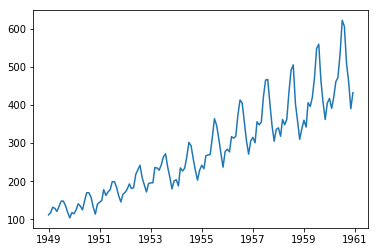

In [4]:
plt.plot(df.Month, df["#Passengers"])

In [5]:
##Feature engienerring

In [6]:
df["t"] = df.index
df["t2"] = df["t"] ** 2
df["month_pred"] = df["Month"].dt.month
df["sin"] = df["month_pred"].apply(lambda x: math.sin(x / 12 * 2 * math.pi))
df["cos"] = df["month_pred"].apply(lambda x: math.cos(x / 12 * 2 * math.pi))

In [7]:
#Split data:
#Last 12M as a validation set

In [8]:
df_test = df.loc[df.Month < "1960-01-01"]
df_validate = df.tail(n=12)

In [27]:
x1 = df_test[["t", "t2"]]
x2 = df_test[["t", "t2", "month_pred"]]
x3 = df_test[["t", "t2", "month_pred", "sin", "cos"]]
y = df_test["#Passengers"]

x1_val = df_validate[["t", "t2"]]
x2_val = df_validate[["t", "t2", "month_pred"]]
x3_val = df_validate[["t", "t2", "month_pred", "sin", "cos"]]
y_val = df_validate["#Passengers"]

In [35]:
def different_models(data_y):
    regr = linear_model.LinearRegression()
    regr.fit(x1, data_y)
    y_pred1 = regr.predict(x1_val)
    
    regr.fit(x2, data_y)
    y_pred2 = regr.predict(x2_val)
    
    regr.fit(x3, data_y)
    y_pred3 = regr.predict(x3_val)
    
    output = pd.DataFrame()
    output["y1"] = y_pred1
    output["y2"] = y_pred2
    output["y3"] = y_pred3
    return output

In [36]:
def plot_errors(x1, y, output):
    plt.plot(x1_val["t"], y,  color='gray')
    plt.plot(x1_val["t"], output["y1"],  color='blue')
    plt.plot(x1_val["t"], output["y2"],  color='red')
    plt.plot(x1_val["t"], output["y3"],  color='green')

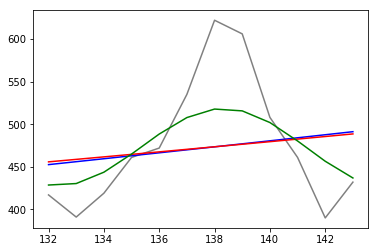

In [37]:
out1 = different_models(y)
plot_errors(x1, y_val, out1)

In [13]:
##Do the same but for log price

In [103]:
y_log = y.apply(lambda x: math.log(x))
y_log_val = y_val.apply(lambda x: math.log(x))

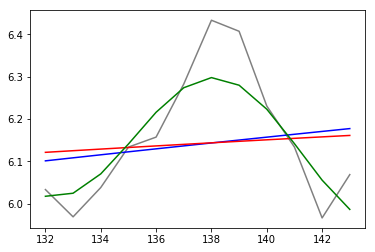

In [49]:
out2 = different_models(y_log)
plot_errors(x1, y_log_val, out2)

In [56]:
out2["y1_exp"] = out2["y1"].apply(lambda x: math.exp(x))
out2["y2_exp"] = out2["y2"].apply(lambda x: math.exp(x))
out2["y3_exp"] = out2["y3"].apply(lambda x: math.exp(x))

In [51]:
y_log_val_exp = y_log_val.apply(lambda x: math.exp(x))

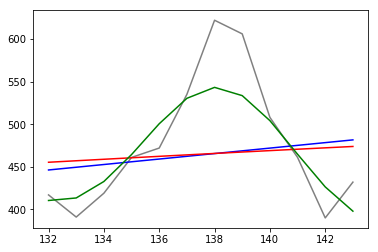

In [58]:
    plt.plot(x1_val["t"], y_log_val_exp,  color='gray')
    plt.plot(x1_val["t"], out2["y1_exp"],  color='blue')
    plt.plot(x1_val["t"], out2["y2_exp"],  color='red')
    plt.plot(x1_val["t"], out2["y3_exp"],  color='green')

In [ ]:
#RandomForrest

In [64]:
rf = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=123456)
rf.fit(x1, y)
rf_y1 = rf.predict(x1_val)

In [65]:
rf = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=123456)
rf.fit(x2, y)
rf_y2 = rf.predict(x2_val)

In [66]:
rf = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=123456)
rf.fit(x3, y)
rf_y3 = rf.predict(x3_val)


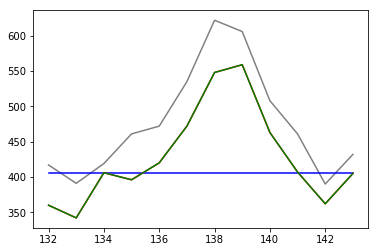

In [67]:
plt.plot(x1_val["t"], y_val,  color='gray')
plt.plot(x1_val["t"], rf_y1,  color='blue')
plt.plot(x1_val["t"], rf_y2,  color='red')
plt.plot(x1_val["t"], rf_y3,  color='green')

In [ ]:
#take a log and check if pred is better

In [131]:
y = df["#Passengers"]

y_log = y.apply(lambda x: math.log(x))
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_log) # <- float values has to be encoded // Check later how it works

encoded_y = encoded[0:132]
encoded_y_val = encoded[132:]

In [132]:
rf = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=123456)
rf.fit(x1, encoded_y)
rf_y1_log = rf.predict(x1_val)

In [133]:
rf = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=123456)
rf.fit(x2, encoded_y)
rf_y2_log = rf.predict(x2_val)

In [134]:
rf = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=123456)
rf.fit(x3, encoded_y)
rf_y3_log = rf.predict(x3_val)

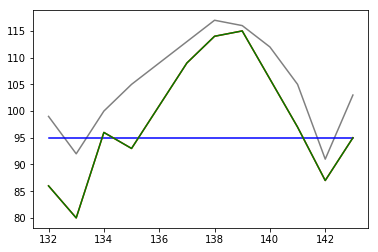

In [135]:
plt.plot(x1_val["t"], encoded_y_val,  color='gray')
plt.plot(x1_val["t"], rf_y1_log,  color='blue')
plt.plot(x1_val["t"], rf_y2_log,  color='red')
plt.plot(x1_val["t"], rf_y3_log,  color='green')

In [ ]:
#check what is wrong with encode

#compare regression and forrest

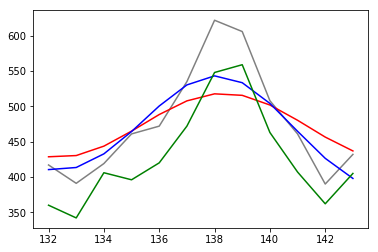

In [145]:
plt.plot(x1_val["t"], y_val,  color='gray')
plt.plot(x1_val["t"], out1["y3"],  color='red')
plt.plot(x1_val["t"], out2["y3_exp"],  color='blue')
plt.plot(x1_val["t"], rf_y3,  color='green')